In [252]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [253]:
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="datatablewide">
<thead><tr><th id="Geography" style="text-align: left;">State or Region</th>
<th id="YEAR_2020">2020 Census</th>
<th id="YEAR_2010">2010 Census</th>
<th id="YEAR_2000">2000 Census</th>
<th id="YEAR_1990">1990 Census</th>
<th id="YEAR_1980">1980 Census</th>
<th id="YEAR_1970">1970 Census</th>
<th id="YEAR_1960">1960 Census</th>
<th id="YEAR_1950">1950 Census</th>
<th id="YEAR_1940">1940 Census</th>
<th id="YEAR_1930">1930 Census</th>
<th id="YEAR_1920">1920 Census</th>
<th id="YEAR_1910">1910 Census</th>
</tr></thead><tbody><tr class="grouphead"><th colspan="13" id="AREA_US" style="text-align: left;">United States</th>
</tr><tr><td class="rowhead" id="POP_US">Resident<br/>
Population</td>
<td>331,449,281</td>
<td>308,745,538</td>
<td>281,421,906</td>
<td>248,709,873</td>
<td>226,545,805</td>
<td>203,211,926</td>
<td>179,323,175</td>
<td>151,325,798</td>
<td>132,165,129</td>
<td>123,202,660</td>
<td>106,021,568</td>
<td>92,228,531</td>
</tr><tr><td class="ro

In [254]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:10000])

[['State or Region', '2020 Census', '2010 Census', '2000 Census', '1990 Census', '1980 Census', '1970 Census', '1960 Census', '1950 Census', '1940 Census', '1930 Census', '1920 Census', '1910 Census'], ['United States'], ['ResidentPopulation', '331,449,281', '308,745,538', '281,421,906', '248,709,873', '226,545,805', '203,211,926', '179,323,175', '151,325,798', '132,165,129', '123,202,660', '106,021,568', '92,228,531'], ['PercentChange', '7.4%', '9.7%', '13.2%', '9.8%', '11.5%', '13.3%', '18.5%', '14.5%', '7.3%', '16.2%', '15.0%', '21.0%'], ['Northeast'], ['ResidentPopulation', '57,609,148', '55,317,240', '53,594,378', '50,809,229', '49,135,283', '49,040,703', '44,677,819', '39,477,986', '35,976,777', '34,427,091', '29,662,053', '25,868,573'], ['PercentChange', '4.1%', '3.2%', '5.5%', '3.4%', '0.2%', '9.8%', '13.2%', '9.7%', '4.5%', '16.1%', '14.7%', '22.9%'], ['Midwest'], ['ResidentPopulation', '68,985,454', '66,927,001', '64,392,776', '59,668,632', '58,865,670', '56,571,663', '51,619

In [255]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('populasjon.csv',table)

In [256]:
def scrape(url, file_name):
    table=[]
    tables=fetch_html_tables(url)
    #iterate over all tables, if there are more than one:
    for tbl in tables:
        #exends table so that table is a list containing elements 
        #from all tables:
        table.extend(html_to_table(tbl))
    #saving it:
    save_data(file_name,table)
    return table

In [257]:
url='https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html'
file_name='populasjon.csv'

table=scrape(url,file_name)

s='\n'.join(['\t'.join(row) for row in table])

# encoding='latin1' er for å få med æ,ø,å
pd.read_csv('populasjon.csv', delimiter=';', encoding='latin1')

,State or Region,2020 Census,2010 Census,2000 Census,1990 Census,1980 Census,1970 Census,1960 Census,1950 Census,1940 Census,1930 Census,1920 Census,1910 Census
0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ResidentPopulation,"331,449,281","308,745,538","281,421,906","248,709,873","226,545,805","203,211,926","179,323,175","151,325,798","132,165,129","123,202,660","106,021,568","92,228,531"
2,PercentChange,7.4%,9.7%,13.2%,9.8%,11.5%,13.3%,18.5%,14.5%,7.3%,16.2%,15.0%,21.0%
3,Northeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ResidentPopulation,"57,609,148","55,317,240","53,594,378","50,809,229","49,135,283","49,040,703","44,677,819","39,477,986","35,976,777","34,427,091","29,662,053","25,868,573"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,ResidentPopulation,"576,851","563,626","493,782","453,588","469,557","332,416","330,066","290,529","250,742","225,565","194,402","145,965"
167,PercentChange,2.3%,14.1%,8.9%,-3.4%,41.3%,0.7%,13.6%,15.9%,11.2%,16.0%,33.2%,57.7%
168,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,ResidentPopulation,"3,285,874","3,725,789","3,808,610","3,522,037","3,196,520","2,712,033","2,349,544","2,210,703","1,869,255","1,543,913","1,299,809","1,118,012"


In [258]:
f = pd.read_csv('populasjon.csv', delimiter=';', encoding='latin1')
f = f[3:8]
f 

,State or Region,2020 Census,2010 Census,2000 Census,1990 Census,1980 Census,1970 Census,1960 Census,1950 Census,1940 Census,1930 Census,1920 Census,1910 Census
3,Northeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ResidentPopulation,"57,609,148","55,317,240","53,594,378","50,809,229","49,135,283","49,040,703","44,677,819","39,477,986","35,976,777","34,427,091","29,662,053","25,868,573"
5,PercentChange,4.1%,3.2%,5.5%,3.4%,0.2%,9.8%,13.2%,9.7%,4.5%,16.1%,14.7%,22.9%
6,Midwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ResidentPopulation,"68,985,454","66,927,001","64,392,776","59,668,632","58,865,670","56,571,663","51,619,139","44,460,762","40,143,332","38,594,100","34,019,792","29,888,542"


In [259]:
f = f.transpose()
f

,3,4,5,6,7
State or Region,Northeast,ResidentPopulation,PercentChange,Midwest,ResidentPopulation
2020 Census,NaN,"57,609,148",4.1%,NaN,"68,985,454"
2010 Census,NaN,"55,317,240",3.2%,NaN,"66,927,001"
2000 Census,NaN,"53,594,378",5.5%,NaN,"64,392,776"
1990 Census,NaN,"50,809,229",3.4%,NaN,"59,668,632"
1980 Census,NaN,"49,135,283",0.2%,NaN,"58,865,670"
1970 Census,NaN,"49,040,703",9.8%,NaN,"56,571,663"
1960 Census,NaN,"44,677,819",13.2%,NaN,"51,619,139"
1950 Census,NaN,"39,477,986",9.7%,NaN,"44,460,762"
1940 Census,NaN,"35,976,777",4.5%,NaN,"40,143,332"


In [260]:
f= f.reset_index(drop= True)
f

,3,4,5,6,7
0,Northeast,ResidentPopulation,PercentChange,Midwest,ResidentPopulation
1,NaN,"57,609,148",4.1%,NaN,"68,985,454"
2,NaN,"55,317,240",3.2%,NaN,"66,927,001"
3,NaN,"53,594,378",5.5%,NaN,"64,392,776"
4,NaN,"50,809,229",3.4%,NaN,"59,668,632"
5,NaN,"49,135,283",0.2%,NaN,"58,865,670"
6,NaN,"49,040,703",9.8%,NaN,"56,571,663"
7,NaN,"44,677,819",13.2%,NaN,"51,619,139"
8,NaN,"39,477,986",9.7%,NaN,"44,460,762"
9,NaN,"35,976,777",4.5%,NaN,"40,143,332"


In [261]:
f["Leap Year"] = ["Leap Year", "2020", "2010", "2000", "1990", "1980", "1970", "1960", "1950", "1940", "1930", "1920", "1910"]
f = f.rename(columns=f.iloc[0])
f.drop(f.index[0], inplace=True)
f

,Northeast,ResidentPopulation,PercentChange,Midwest,ResidentPopulation,Leap Year
1,NaN,"57,609,148",4.1%,NaN,"68,985,454",2020
2,NaN,"55,317,240",3.2%,NaN,"66,927,001",2010
3,NaN,"53,594,378",5.5%,NaN,"64,392,776",2000
4,NaN,"50,809,229",3.4%,NaN,"59,668,632",1990
5,NaN,"49,135,283",0.2%,NaN,"58,865,670",1980
6,NaN,"49,040,703",9.8%,NaN,"56,571,663",1970
7,NaN,"44,677,819",13.2%,NaN,"51,619,139",1960
8,NaN,"39,477,986",9.7%,NaN,"44,460,762",1950
9,NaN,"35,976,777",4.5%,NaN,"40,143,332",1940
10,NaN,"34,427,091",16.1%,NaN,"38,594,100",1930


In [262]:
f = f.drop(columns=['PercentChange', 'Northeast', 'Midwest'])
f

,ResidentPopulation,ResidentPopulation,Leap Year
1,"57,609,148","68,985,454",2020
2,"55,317,240","66,927,001",2010
3,"53,594,378","64,392,776",2000
4,"50,809,229","59,668,632",1990
5,"49,135,283","58,865,670",1980
6,"49,040,703","56,571,663",1970
7,"44,677,819","51,619,139",1960
8,"39,477,986","44,460,762",1950
9,"35,976,777","40,143,332",1940
10,"34,427,091","38,594,100",1930


In [263]:
f.rename({'ResidentPopulation': 'NorthEast'}, axis=1)
f

,ResidentPopulation,ResidentPopulation,Leap Year
1,"57,609,148","68,985,454",2020
2,"55,317,240","66,927,001",2010
3,"53,594,378","64,392,776",2000
4,"50,809,229","59,668,632",1990
5,"49,135,283","58,865,670",1980
6,"49,040,703","56,571,663",1970
7,"44,677,819","51,619,139",1960
8,"39,477,986","44,460,762",1950
9,"35,976,777","40,143,332",1940
10,"34,427,091","38,594,100",1930


In [264]:
#samme navn må vi bytte navn med bruk av index

f = f.rename(columns={f.columns[0]: "NorthEast"})
f

,NorthEast,NorthEast,Leap Year
1,"57,609,148","68,985,454",2020
2,"55,317,240","66,927,001",2010
3,"53,594,378","64,392,776",2000
4,"50,809,229","59,668,632",1990
5,"49,135,283","58,865,670",1980
6,"49,040,703","56,571,663",1970
7,"44,677,819","51,619,139",1960
8,"39,477,986","44,460,762",1950
9,"35,976,777","40,143,332",1940
10,"34,427,091","38,594,100",1930


In [265]:
f.dtypes


NorthEast    object
NorthEast    object
Leap Year    object
dtype: object

In [269]:
f.columns = ['Northeast', 'MidWest', 'Leap Year']
f

,Northeast,MidWest,Leap Year
1,"57,609,148","68,985,454",2020
2,"55,317,240","66,927,001",2010
3,"53,594,378","64,392,776",2000
4,"50,809,229","59,668,632",1990
5,"49,135,283","58,865,670",1980
6,"49,040,703","56,571,663",1970
7,"44,677,819","51,619,139",1960
8,"39,477,986","44,460,762",1950
9,"35,976,777","40,143,332",1940
10,"34,427,091","38,594,100",1930


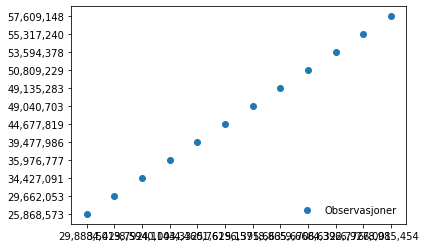

In [298]:
fig,ax=plt.subplots()

#plotting the function:
ax.scatter(f['MidWest'], f['Northeast'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [272]:
y=f['Northeast']
pd.DataFrame(y)

,Northeast
1,"57,609,148"
2,"55,317,240"
3,"53,594,378"
4,"50,809,229"
5,"49,135,283"
6,"49,040,703"
7,"44,677,819"
8,"39,477,986"
9,"35,976,777"
10,"34,427,091"


In [287]:
f.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Northeast  12 non-null     object
 1   MidWest    12 non-null     object
 2   Leap Year  12 non-null     object
dtypes: object(3)
memory usage: 384.0+ bytes


In [292]:
f.apply(pd.to_numeric, errors='ignore').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Northeast  12 non-null     object
 1   MidWest    12 non-null     object
 2   Leap Year  12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 384.0+ bytes


In [296]:
x=pd.DataFrame(np.log(f['MidWest']))
x['intercept']=1
x

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [299]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

ModuleNotFoundError: No module named 'statsmodels'

In [300]:
x=np.linspace(min(np.log(g['MidWest'])), max(np.log(g['MidWest'])), 100)

regression_line=res.params['intercept']+res.params['MidWest']*x

ax.plot(x, regression_line,color='red')
fig

NameError: name 'g' is not defined